In [101]:
#импортируем библиотеки
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import statsmodels.formula.api as sf
import numpy as np

In [102]:
#считываем данные
df = pd.read_excel(r'g:\Yandex\Задание_вып.xls', sheet_name='Мини моделирование', header=1)

In [103]:
#немного переименовываем колонки для удобства работы
df.rename(columns={'Общие конверсии':'Общие_конверсии',
                     'Автобусы/Кинотеатры/Лифты/Метро OTS':'Автобусы',
                     'ООН/Радио/Транспорт/DООН/Digital/Indoor OTS':'ООН',
                  'Интерес к поиску работы':'поиск_работы',
                  'Интерес к бренду':'бренд',
                  'Интерес к брендам конкурентов':'конкуренты',
                  'Индекс самоизоляции':'самоизоляции',
                  'Безработица_Все гео':'Безработица',
                  'Гос праздники + НГ':'праздники',
                  'Созданные компании':'Созданные',
                  'Ликвидированные компании':'Ликвидированные',
                  'Запросы Гугл Трендс':'Гугл_Трендс'}, inplace=True)

In [104]:
y = df['Общие_конверсии']

In [105]:
X0=df.drop(['Общие_конверсии'], axis = 1)

In [129]:
X=df.drop(['Общие_конверсии', 'Дата'], axis = 1)

In [107]:
df.columns

Index(['Дата', 'Google_performance_shows', 'Yandex_performance_shows',
       'YouTube_shows', 'MyTarget_shows', 'Native_Roll_охваты', 'IVI_Показы',
       'TВ_Рейтинги', 'ФБ_охваты', 'ВК_показы', 'Автобусы', 'ООН',
       'поиск_работы', 'бренд', 'конкуренты', 'самоизоляции', 'Безработица',
       'праздники', 'Созданные', 'Ликвидированные', 'Гугл_Трендс',
       'Общие_конверсии'],
      dtype='object')

In [130]:
#Удалим сильно коррелируюшие столбцы - (определили в Excel)
X1=X.drop(['Ликвидированные', 'конкуренты'], axis = 1)
# X2=X1.drop(['ООН/Радио/Транспорт/DООН/Digital/Indoor OTS', 'Интерес к поиску работы'], axis = 1)
# X3=X2.drop(['Индекс самоизоляции'], axis = 1)
# X4=X3.drop(['Созданные компании'], axis = 1)
# X5=X4.drop(['Запросы Гугл Трендс'], axis = 1)
# X6=X5.drop(['Google_performance_shows', 'MyTarget_shows'], axis = 1)
# X7=X6.drop(['ФБ_охваты'], axis = 1)


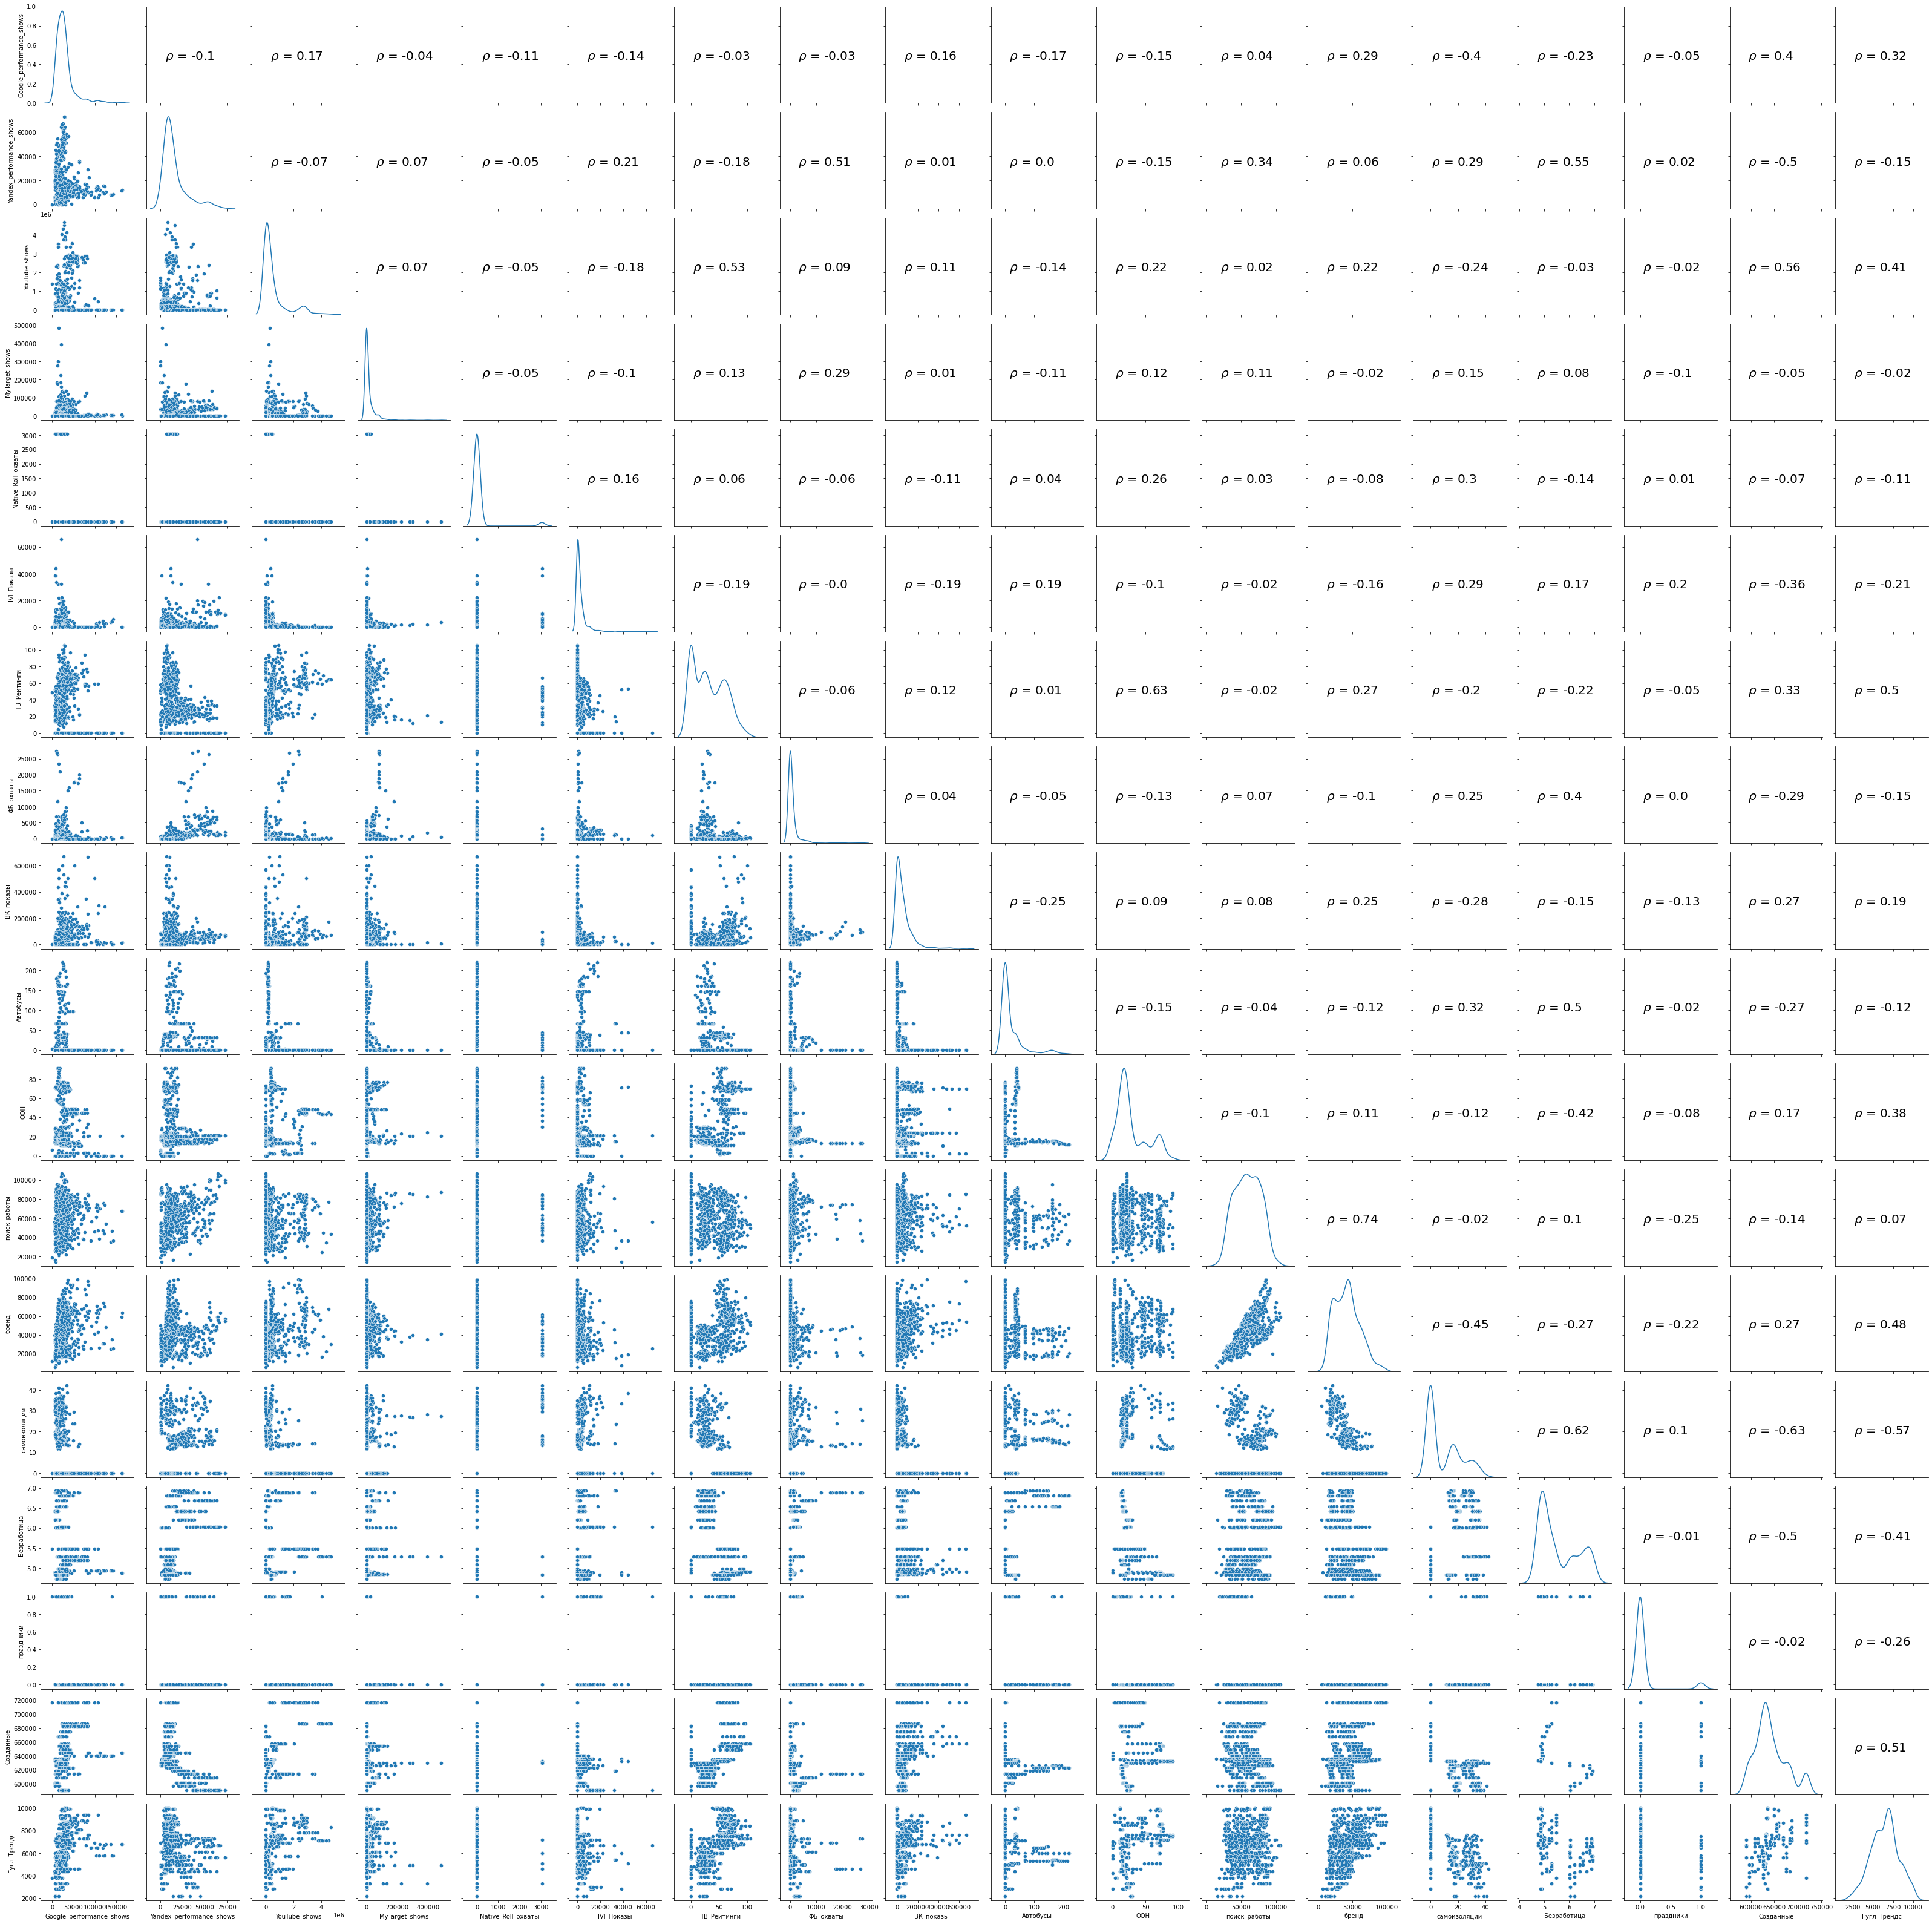

In [109]:
#попарные скаттерплоты независимых переменных

# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(X1, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

In [110]:
import statsmodels.api as sm # import statsmodels 


In [111]:
# модель, построенная со всеми предикторами (в том числе с высоким значением корреляции)

X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Общие_конверсии   R-squared:                       0.919
Model:                            OLS   Adj. R-squared:                  0.917
Method:                 Least Squares   F-statistic:                     444.5
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:14:08   Log-Likelihood:                -8942.2
No. Observations:                 762   AIC:                         1.792e+04
Df Residuals:                     742   BIC:                         1.802e+04
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      1.22e+07   8.63e+05     14.135      0.000    1.05e+07    1.39e+07
Google_performance_shows    -0.1979      0.065     -3.065      0.002      -0.325      -0.071
Yandex_performance_shows     0.5403      0.143      3.774      0.000       0.259       0.821
YouTube_shows               -0.0002      0.002     -0.100      0.920      -0.004       0.004
MyTarget_shows              -0.0435      0.033     -1.322      0.187      -0.108       0.021
Native_Roll_охваты           8.9298      2.452      3.642      0.000       4.116      13.743
IVI_Показы                  -0.4119      0.246     -1.674      0.095      -0.895       0.071
TВ_Рейтинги               -287.3280     69.616     -4.127      0.000    -423.996    -150.660
ФБ_охваты                    0.8133      0.495      1.641      0.101      -0.159       1.786
ВК_показы                    0.0549      0.014      3.900      0.000       0.027       0.083
Автобусы                   323.6753     38.864      8.328      0.000     247.379     399.971
ООН                        406.6220     81.844      4.968      0.000     245.948     567.296
поиск_работы                 2.1078      0.149     14.189      0.000       1.816       2.399
бренд                        0.7215      0.031     23.185      0.000       0.660       0.783
конкуренты                   1.4423      0.062     23.172      0.000       1.320       1.564
самоизоляции               889.6399    204.201      4.357      0.000     488.758    1290.521
Безработица               3.874e+04   4286.274      9.038      0.000    3.03e+04    4.72e+04
праздники                 -867.1660   5359.451     -0.162      0.872   -1.14e+04    9654.327
Созданные                   -8.9058      0.657    -13.554      0.000     -10.196      -7.616
Ликвидированные             -5.1965      0.353    -14.722      0.000      -5.889      -4.504
Гугл_Трендс                  0.3852      1.084      0.355      0.722      -1.743       2.513
==============================================================================
Omnibus:                       12.728   Durbin-Watson:                   0.717
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               16.960
Skew:                           0.180   Prob(JB):                     0.000208
Kurtosis:                       3.636   Cond. No.                     7.66e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.23e-23. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [131]:
# модель, построенная без сильно коррелирующих предикторов (Rxy>0,9) и даты.

X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X1).fit() ## sm.OLS(output, input)
predictions = model.predict(X1)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Общие_конверсии   R-squared:                       0.896
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     354.2
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:22:35   Log-Likelihood:                -9039.8
No. Observations:                 762   AIC:                         1.812e+04
Df Residuals:                     743   BIC:                         1.821e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.867e+05   5.46e+04     -8.920      0.000   -5.94e+05    -3.8e+05
Google_performance_shows    -0.0451      0.072     -0.623      0.534      -0.187       0.097
Yandex_performance_shows     0.2443      0.161      1.517      0.130      -0.072       0.560
YouTube_shows               -0.0023      0.002     -0.981      0.327      -0.007       0.002
MyTarget_shows              -0.0308      0.037     -0.825      0.410      -0.104       0.043
Native_Roll_охваты           4.4442      2.764      1.608      0.108      -0.981       9.870
IVI_Показы                  -0.8147      0.278     -2.933      0.003      -1.360      -0.269
TВ_Рейтинги               -505.4267     77.269     -6.541      0.000    -657.118    -353.736
ФБ_охваты                    0.6904      0.563      1.227      0.220      -0.414       1.795
ВК_показы                    0.1010      0.016      6.475      0.000       0.070       0.132
Автобусы                   207.8807     43.233      4.808      0.000     123.007     292.755
ООН                        684.0309     90.473      7.561      0.000     506.418     861.644
поиск_работы                 1.2897      0.156      8.241      0.000       0.982       1.597
бренд                        4.0071      0.174     23.026      0.000       3.665       4.349
самоизоляции              -553.7693    203.474     -2.722      0.007    -953.223    -154.316
Безработица               6138.6669   4168.889      1.472      0.141   -2045.538    1.43e+04
праздники                -1.355e+04   6008.796     -2.256      0.024   -2.54e+04   -1757.811
Созданные                    0.7152      0.078      9.207      0.000       0.563       0.868
Гугл_Трендс                 -0.8152      1.228     -0.664      0.507      -3.226       1.595
==============================================================================
Omnibus:                       51.038   Durbin-Watson:                   0.649
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.929
Skew:                           0.523   Prob(JB):                     3.25e-17
Kurtosis:                       4.140   Cond. No.                     4.74e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Исключим из модели статистически незначимые предикторы (p>0,05)

In [132]:

X1=X1.drop(['Google_performance_shows', 'YouTube_shows', 'MyTarget_shows', 'Гугл_Трендс', \
            'Безработица','ФБ_охваты','Native_Roll_охваты'], axis = 1)

In [133]:
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X1).fit() ## sm.OLS(output, input)
predictions = model.predict(X1)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Общие_конверсии   R-squared:                       0.895
Model:                            OLS   Adj. R-squared:                  0.893
Method:                 Least Squares   F-statistic:                     578.5
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:22:41   Log-Likelihood:                -9043.7
No. Observations:                 762   AIC:                         1.811e+04
Df Residuals:                     750   BIC:                         1.817e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4.389e+05   4.01e+04    -10.933      0.000   -5.18e+05    -3.6e+05
Yandex_performance_shows     0.3890      0.114      3.416      0.001       0.165       0.613
IVI_Показы                  -0.8741      0.269     -3.250      0.001      -1.402      -0.346
TВ_Рейтинги               -524.3802     65.422     -8.015      0.000    -652.811    -395.949
ВК_показы                    0.1061      0.015      6.948      0.000       0.076       0.136
Автобусы                   246.0372     33.121      7.429      0.000     181.017     311.057
ООН                        644.9006     74.335      8.676      0.000     498.971     790.831
поиск_работы                 1.3389      0.142      9.406      0.000       1.059       1.618
бренд                        3.9031      0.155     25.155      0.000       3.599       4.208
самоизоляции              -315.5564    159.261     -1.981      0.048    -628.207      -2.906
праздники                -1.359e+04   5597.411     -2.428      0.015   -2.46e+04   -2603.072
Созданные                    0.6793      0.060     11.414      0.000       0.562       0.796
==============================================================================
Omnibus:                       48.126   Durbin-Watson:                   0.660
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.936
Skew:                           0.518   Prob(JB):                     1.77e-15
Kurtosis:                       4.033   Cond. No.                     2.07e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.07e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2559: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
C:\ProgramData\Miniconda3\lib\site-packages\numpy\lib\function_base.py:2560: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
C:\ProgramData\Miniconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


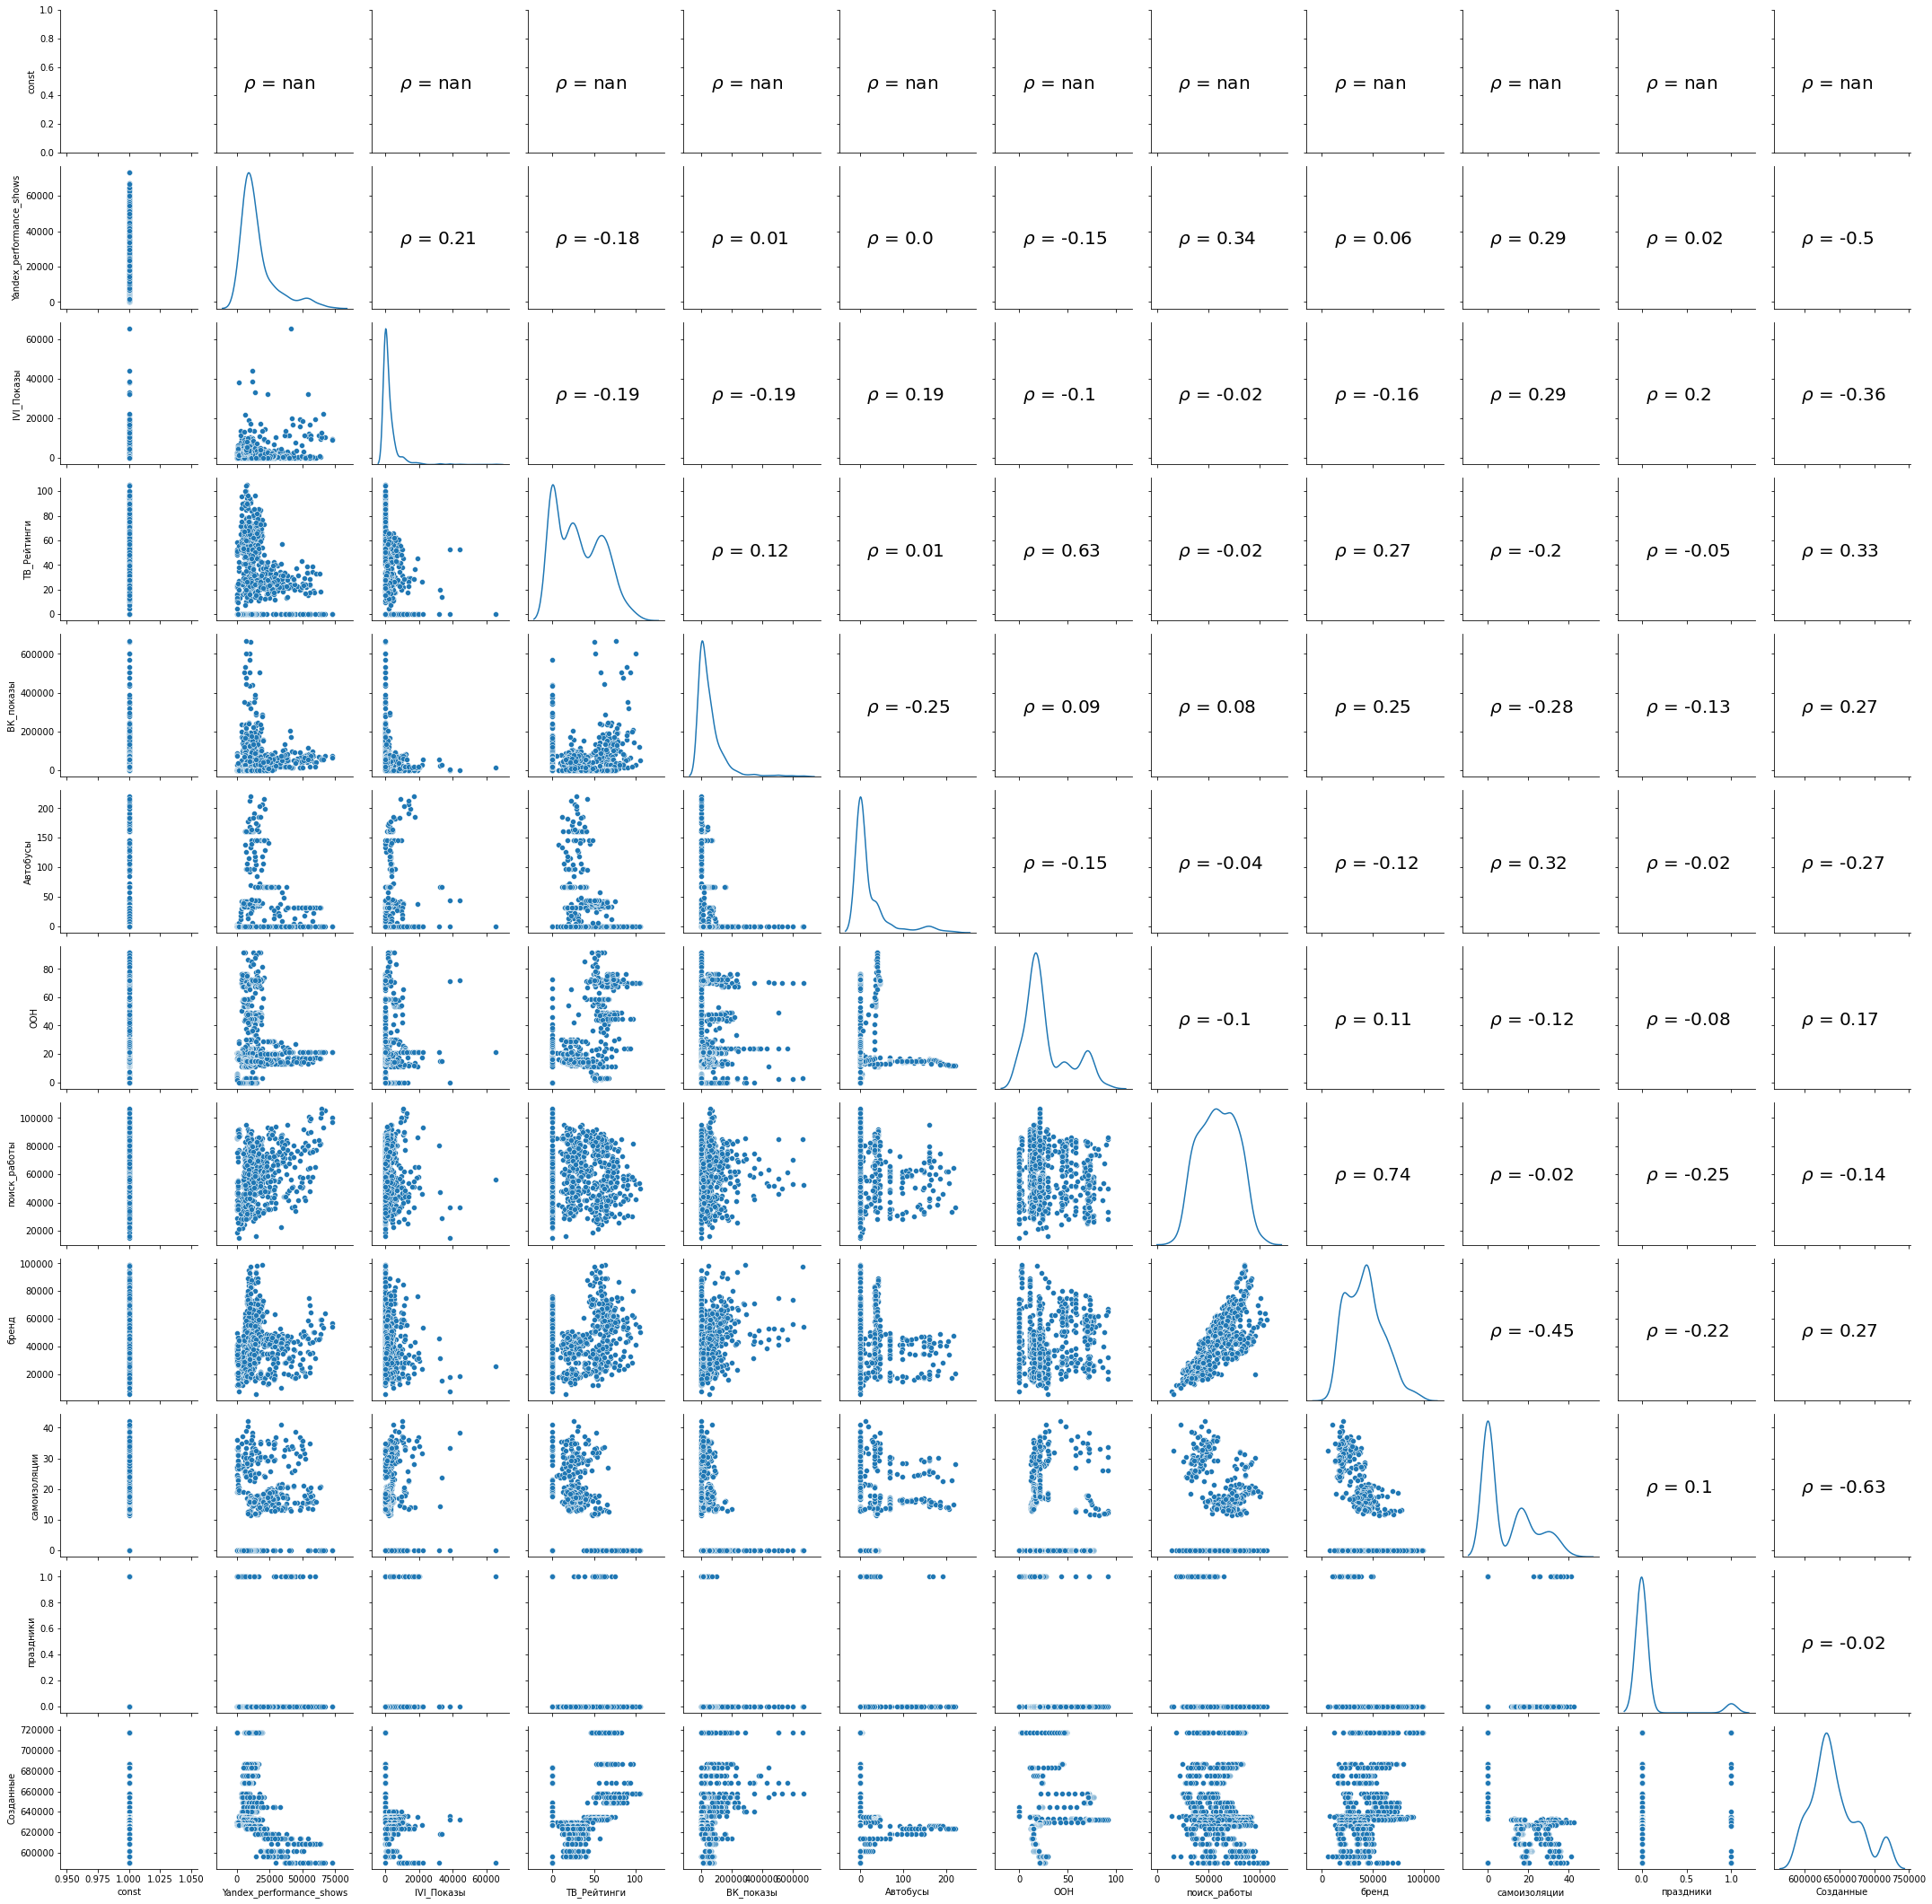

In [115]:
# Function to calculate correlation coefficient between two arrays
def corr(x, y, **kwargs):
    # Calculate the value
    coef = np.corrcoef(x, y)[0][1]
    # Make the label
    label = r'$\rho$ = ' + str(round(coef, 2))
    # Add the label to the plot
    ax = plt.gca()
    ax.annotate(label, xy = (0.2, 0.45), size = 20, xycoords = ax.transAxes)

g = sns.PairGrid(X1, diag_sharey=False)
# g.map_upper(sns.scatterplot)
g.map_upper(corr)
g.map_lower(sns.scatterplot)
g.map_diag(sns.kdeplot)

In [116]:
X1.head(5)

,const,Yandex_performance_shows,IVI_Показы,TВ_Рейтинги,ВК_показы,Автобусы,ООН,поиск_работы,бренд,самоизоляции,праздники,Созданные
0,1.0,0.000000,0.0,48.788571,0,2.857714,6.350524,18967.6,11754,0.0,1,717347
1,1.0,0.000000,0.0,52.223333,0,2.381429,5.596048,29139.8,20592,0.0,1,717347
2,1.0,0.000000,0.0,50.685714,0,1.905143,4.841571,34863.0,28266,0.0,1,717347
3,1.0,0.000000,0.0,48.011429,0,1.428857,4.087095,38701.4,32370,0.0,1,717347
4,1.0,9.533333,0.0,50.080000,0,0.952571,3.332619,37812.8,31542,0.0,1,717347


In [134]:
# прологарифмируем предикторы, имеющие нулевые (добавим 0.001 для исключения абсолютных нулей) и большие ненулевые значения
X1['Yandex_performance_shows'] = X1['Yandex_performance_shows'].apply(lambda x:np.log(x+0.001))


In [135]:
X1['IVI_Показы'] = X1['IVI_Показы'].apply(lambda x:np.log(x+0.001))
X1['ВК_показы'] = X1['ВК_показы'].apply(lambda x:np.log(x+0.001))
X1.rename(columns={'Yandex_performance_shows':'log_Yandex_performance_shows',
                  'IVI_Показы':'log_IVI_Показы',
                   'ВК_показы':'log_ВК_показы' }, inplace=True)
                  
#X1['Автобусы'] = X1['Автобусы'].apply(lambda x:np.log(x+0.001))
#X1['самоизоляции'] = X1['самоизоляции'].apply(lambda x:np.log(x+0.001))

In [136]:
X1

,const,log_Yandex_performance_shows,log_IVI_Показы,TВ_Рейтинги,log_ВК_показы,Автобусы,ООН,поиск_работы,бренд,самоизоляции,праздники,Созданные
0,1.0,-6.907755,-6.907755,48.788571,-6.907755,2.857714,6.350524,18967.6,11754,0.0,1,717347
1,1.0,-6.907755,-6.907755,52.223333,-6.907755,2.381429,5.596048,29139.8,20592,0.0,1,717347
2,1.0,-6.907755,-6.907755,50.685714,-6.907755,1.905143,4.841571,34863.0,28266,0.0,1,717347
3,1.0,-6.907755,-6.907755,48.011429,-6.907755,1.428857,4.087095,38701.4,32370,0.0,1,717347
4,1.0,2.254899,-6.907755,50.080000,-6.907755,0.952571,3.332619,37812.8,31542,0.0,1,717347
...,...,...,...,...,...,...,...,...,...,...,...,...
757,1.0,11.077607,9.468079,0.000000,10.939213,0.000000,21.100000,103653.4,55716,0.0,0,590417
758,1.0,11.104919,10.019429,0.000000,10.935105,0.000000,21.100000,93412.4,53376,0.0,0,590417
759,1.0,10.901781,10.380548,0.000000,10.923976,0.000000,21.100000,80649.4,45708,0.0,0,590417
760,1.0,10.637486,11.091846,0.000000,9.339261,0.000000,21.100000,56063.4,25374,0.0,1,590417


In [137]:
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X1).fit() ## sm.OLS(output, input)
predictions = model.predict(X1)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Общие_конверсии   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     648.6
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:22:55   Log-Likelihood:                -9004.5
No. Observations:                 762   AIC:                         1.803e+04
Df Residuals:                     750   BIC:                         1.809e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -4.812e+05   4.41e+04    -10.909      0.000   -5.68e+05   -3.95e+05
log_Yandex_performance_shows  5808.6471    928.006      6.259      0.000    3986.849    7630.445
log_IVI_Показы               -1334.4722    290.855     -4.588      0.000   -1905.459    -763.485
TВ_Рейтинги                   -420.7009     62.061     -6.779      0.000    -542.534    -298.868
log_ВК_показы                 1113.0830    184.814      6.023      0.000     750.268    1475.898
Автобусы                       276.8197     33.202      8.338      0.000     211.641     341.999
ООН                            508.1581     72.330      7.026      0.000     366.165     650.151
поиск_работы                     1.4820      0.133     11.116      0.000       1.220       1.744
бренд                            3.8583      0.147     26.173      0.000       3.569       4.148
самоизоляции                  -136.2635    158.861     -0.858      0.391    -448.128     175.601
праздники                    -5924.9334   5391.533     -1.099      0.272   -1.65e+04    4659.357
Созданные                        0.6559      0.062     10.539      0.000       0.534       0.778
==============================================================================
Omnibus:                       40.279   Durbin-Watson:                   0.707
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.180
Skew:                           0.432   Prob(JB):                     8.55e-14
Kurtosis:                       4.072   Cond. No.                     2.39e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.39e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

получили модель с более высоким уточненным R2 (0.903), но с болеетяжелой интерпретацией 
(log-предикторы: при изменении на 1% получаем изменение абсолютное изменение ЗП на coef/100 единиц)

При этом "индекс самоизоляции" и "праздники" стали статистически незначимыми.

In [138]:
X1=X1.drop(['самоизоляции', 'праздники'], axis = 1)

In [139]:
X1 = sm.add_constant(X1) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X1).fit() ## sm.OLS(output, input)
predictions = model.predict(X1)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        Общие_конверсии   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.903
Method:                 Least Squares   F-statistic:                     792.3
Date:                Sun, 25 Apr 2021   Prob (F-statistic):               0.00
Time:                        14:27:53   Log-Likelihood:                -9005.6
No. Observations:                 762   AIC:                         1.803e+04
Df Residuals:                     752   BIC:                         1.808e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                        -4.985e+05   4.26e+04    -11.715      0.000   -5.82e+05   -4.15e+05
log_Yandex_performance_shows  6028.2495    907.767      6.641      0.000    4246.190    7810.309
log_IVI_Показы               -1385.8117    275.807     -5.025      0.000   -1927.254    -844.369
TВ_Рейтинги                   -428.3441     61.717     -6.940      0.000    -549.503    -307.186
log_ВК_показы                 1123.9273    182.679      6.152      0.000     765.307    1482.548
Автобусы                       275.2133     32.662      8.426      0.000     211.093     339.333
ООН                            510.5562     71.494      7.141      0.000     370.204     650.908
поиск_работы                     1.4659      0.126     11.614      0.000       1.218       1.714
бренд                            3.9145      0.131     29.807      0.000       3.657       4.172
Созданные                        0.6752      0.061     11.098      0.000       0.556       0.795
==============================================================================
Omnibus:                       40.360   Durbin-Watson:                   0.689
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               61.378
Skew:                           0.427   Prob(JB):                     4.70e-14
Kurtosis:                       4.098   Cond. No.                     2.30e+07
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.3e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

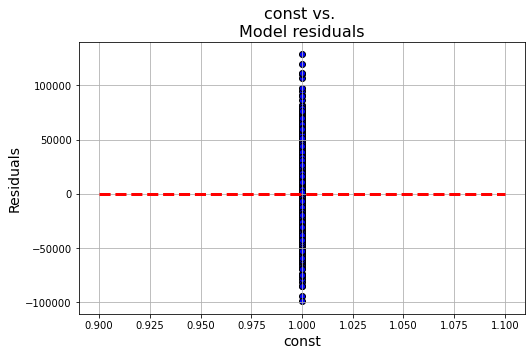

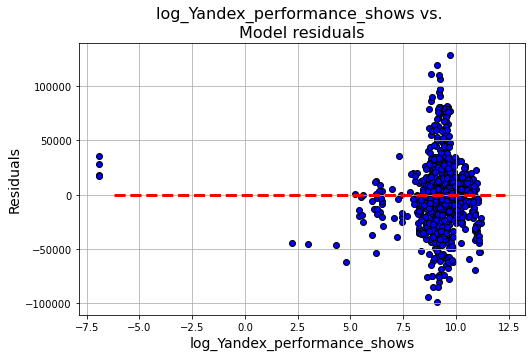

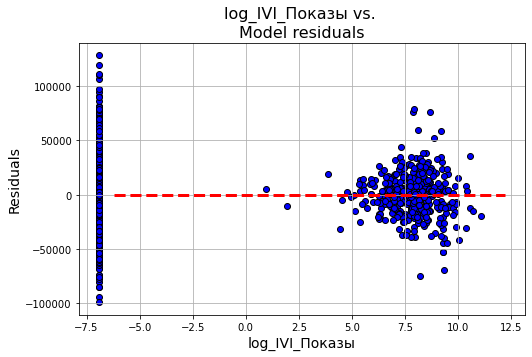

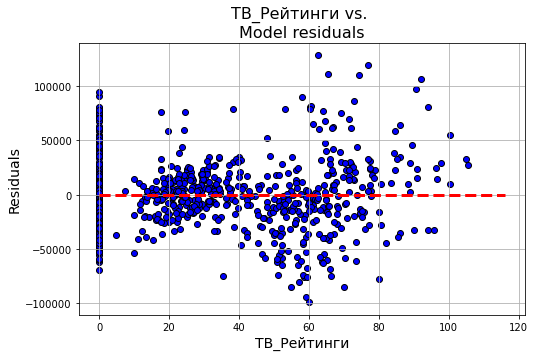

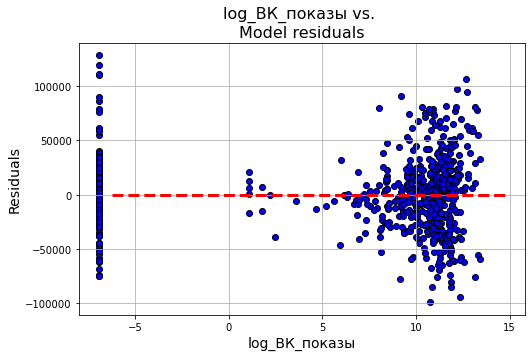

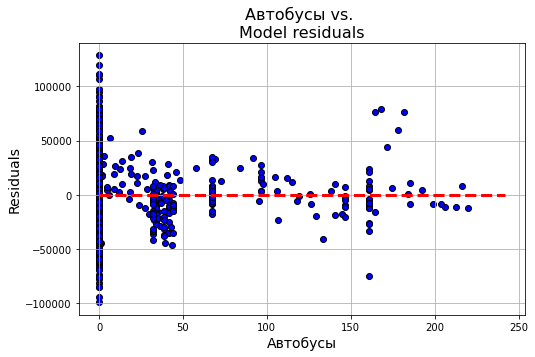

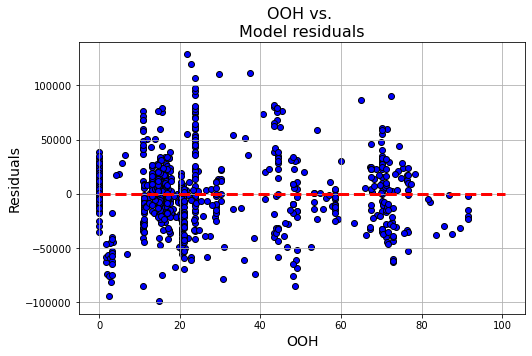

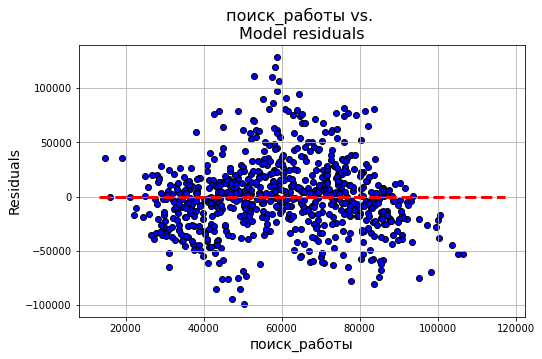

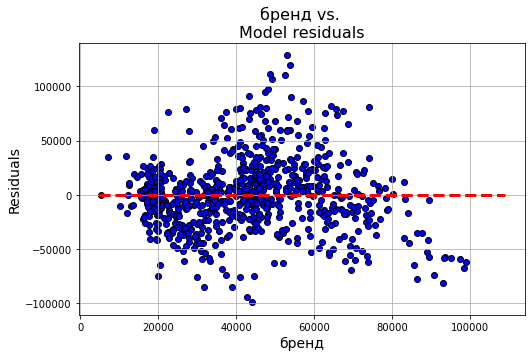

In [140]:
#графики рапределения остатков
for c in X1.columns[:-1]:
    plt.figure(figsize=(8,5))
    plt.title("{} vs. \nModel residuals".format(c),fontsize=16)
    plt.scatter(x=X1[c],y=model.resid,color='blue',edgecolor='k')
    plt.grid(True)
    xmin=min(X1[c])
    xmax = max(X1[c])
    plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
    plt.xlabel(c,fontsize=14)
    plt.ylabel('Residuals',fontsize=14)
    plt.show()


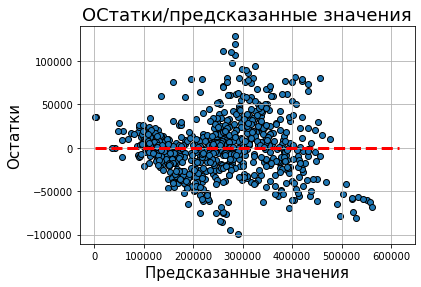

In [141]:
# график зависмости остатков от предсказанных занчений - должен 
p=plt.scatter(x=model.fittedvalues,y=model.resid,edgecolor='k')
xmin=min(model.fittedvalues)
xmax = max(model.fittedvalues)
plt.hlines(y=0,xmin=xmin*0.9,xmax=xmax*1.1,color='red',linestyle='--',lw=3)
plt.xlabel("Предсказанные значения",fontsize=15)
plt.ylabel("Остатки",fontsize=15)
plt.title("ОСтатки/предсказанные значения",fontsize=18)
plt.grid(True)
plt.show()


ГЕТЕРОСКЕДАСТИЧНОСТЬ????????

In [31]:
from statsmodels.graphics.gofplots import qqplot

<Figure size 576x360 with 0 Axes>

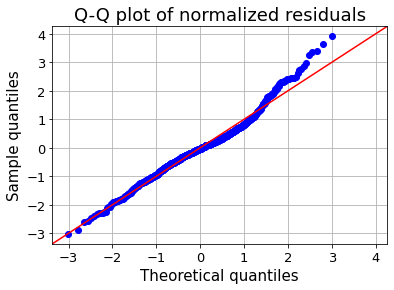

In [142]:
# -QQ-plot для остатков
plt.figure(figsize=(8,5))
fig=qqplot(model.resid_pearson,line='45',fit='True')
plt.xticks(fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Theoretical quantiles",fontsize=15)
plt.ylabel("Sample quantiles",fontsize=15)
plt.title("Q-Q plot of normalized residuals",fontsize=18)
plt.grid(True)
plt.show()

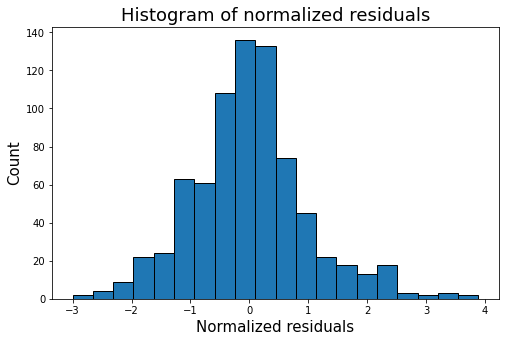

In [143]:
# ГИСТОГРАММА ОСТАТКОВ
plt.figure(figsize=(8,5))
plt.hist(model.resid_pearson,bins=20,edgecolor='k')
plt.ylabel('Count',fontsize=15)
plt.xlabel('Normalized residuals',fontsize=15)
plt.title("Histogram of normalized residuals",fontsize=18)
plt.show()

In [75]:
from scipy.stats import shapiro

In [144]:
#тест Шапиро-Уилка для остатков
_,p=shapiro(model.resid)

In [145]:
p

3.558922045954205e-09

Результаты теста показывают, что остатки распределены НЕ нормально (p<<0.01)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [146]:
for i in range(len(X1.columns[:-1])):
    v=vif(np.matrix(X1[:-1]),i)
    print("Variance inflation factor for {}: {}".format(X1.columns[i],round(v,2)))

Variance inflation factor for const: 1270.92
Variance inflation factor for log_Yandex_performance_shows: 1.41
Variance inflation factor for log_IVI_Показы: 2.95
Variance inflation factor for TВ_Рейтинги: 2.07
Variance inflation factor for log_ВК_показы: 1.44
Variance inflation factor for Автобусы: 1.42
Variance inflation factor for ООН: 1.9
Variance inflation factor for поиск_работы: 3.72
Variance inflation factor for бренд: 3.97


Все VIF < 10, что говорит об отстутсвии мультиколлинеарности в данных.

In [79]:
from statsmodels.stats.outliers_influence import OLSInfluence as influence

In [147]:
inf=influence(model)

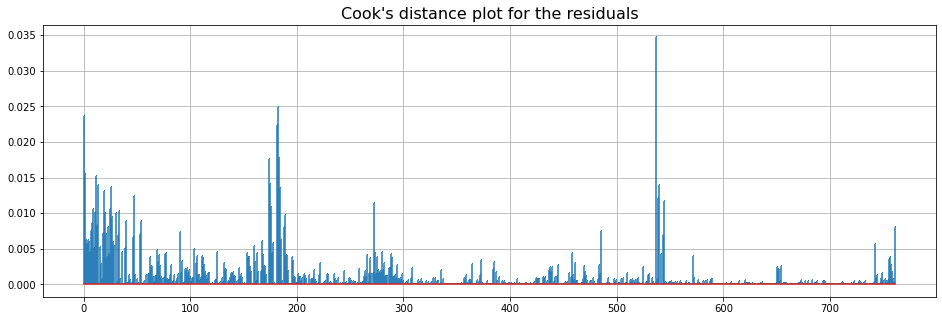

In [148]:
(c, p) = inf.cooks_distance
plt.figure(figsize=(16,5))
plt.title("Cook's distance plot for the residuals",fontsize=16)
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.grid(True)
plt.show()